In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def read_csv():
    data = pd.read_csv('logistic regression dataset-Social_Network_Ads.csv')
    return data

In [3]:
data = read_csv()
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.drop(axis=1,labels='User ID',inplace=True) #remove userid

In [5]:
#Create dummies data for gender 0 1 and drop Female column
gender = pd.get_dummies(data['Gender'])
gender.drop(axis=1,labels='Female',inplace=True)

In [6]:
#Concat 2 dataframe and drop Gender
data = pd.concat([data,gender],axis=1)
data.drop(labels='Gender',axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [7]:
scaler = MinMaxScaler()
data[['EstimatedSalary']]=scaler.fit_transform(data[['EstimatedSalary']])

In [8]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,0.029630,0,1
1,35,0.037037,0,1
2,26,0.207407,0,0
3,27,0.311111,0,0
4,19,0.451852,0,1


In [9]:
train_x,test_x,train_y,test_y = train_test_split(data[['Age','EstimatedSalary','Male']],data[['Purchased']],test_size=0.33)
train_x = train_x.values
test_x = test_x.values
train_y = train_y.values
test_y = test_y.values

In [25]:
# Number of Epochs in our training
numEpochs = 7000

#Batch Size
batch_size=64

# Defining our learning rate iterations (decay)
#learningRate = tf.train.exponential_decay(learning_rate=0.0008,global_step= 1,decay_steps=train_x.shape[0],decay_rate= 0.95,staircase=True)
learningRate = 0.005

In [26]:
# logistic regression
num_trains = train_x.shape[0]
num_features = train_x.shape[1]

x = tf.placeholder(tf.float32,shape=[None,num_features])
y = tf.placeholder(tf.float32,shape=[None,1])
bias = tf.Variable(tf.random_normal([1],mean=0,stddev=0.01,name="bias"))
weights = tf.Variable(tf.random_normal([num_features,1],mean=0,stddev=0.01,name="weights"))
#y_pred = tf.matmul(x,weights)+bias
y_pred = tf.nn.sigmoid(tf.matmul(x,weights)+bias,name="calculate")
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y))
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred), reduction_indices=1))
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost)

##### Start training model
# Define the variable that stores the result
check_cost=[]
train_acc = []
test_acc = []

In [27]:
def CrossEntropy(yHat, y):
    if y == 1:
        return -math.log(yHat)
    else:
        return -math.log(1 - yHat)

Epoch 0 : Loss 0.8166834712028503
Epoch 50 : Loss 0.6994759440422058
Epoch 100 : Loss 0.6963800191879272
Epoch 150 : Loss 0.6953417062759399
Epoch 200 : Loss 0.6948174834251404
Epoch 250 : Loss 0.6944999098777771
Epoch 300 : Loss 0.6942862868309021
Epoch 350 : Loss 0.6941324472427368
Epoch 400 : Loss 0.6940162181854248
Epoch 450 : Loss 0.6939252018928528
Epoch 500 : Loss 0.6938519477844238
Epoch 550 : Loss 0.6937915086746216
Epoch 600 : Loss 0.6937411427497864
Epoch 650 : Loss 0.6936981678009033
Epoch 700 : Loss 0.6936612129211426
Epoch 750 : Loss 0.6936290860176086
Epoch 800 : Loss 0.6936006546020508
Epoch 850 : Loss 0.6935756206512451
Epoch 900 : Loss 0.6935533285140991
Epoch 950 : Loss 0.693533182144165
Epoch 1000 : Loss 0.6935151219367981
Epoch 1050 : Loss 0.6934986114501953
Epoch 1100 : Loss 0.6934835314750671
Epoch 1150 : Loss 0.6934697031974792
Epoch 1200 : Loss 0.6934572458267212
Epoch 1250 : Loss 0.6934455037117004
Epoch 1300 : Loss 0.6934348344802856
Epoch 1350 : Loss 0.69342

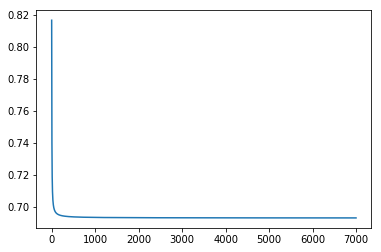

In [28]:
check_cost=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpochs):
        _,temp_cost = sess.run([training_OP,cost],feed_dict={x:train_x,y:train_y})
        check_cost.append(temp_cost)
        if epoch % 50 == 0:
            print("Epoch {} : Loss {}".format(epoch,temp_cost))
    # Calculate the correct predictions
    correct_prediction = tf.to_float(tf.greater(y_pred, 0.5))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, correct_prediction)))

    print ("Train Accuracy:", accuracy.eval({x: train_x, y: train_y}))
    print ("Test Accuracy:", accuracy.eval({x: test_x, y: test_y}))
plt.plot(check_cost)
plt.show()

